 **MARKET BASKET ANALYSIS**


**Using FP-growth algorithm with mlxtend Python library**

In [ ]:
#Installing the necessary libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import psutil

In [ ]:
#save timestamp to check script's running time
startTime = datetime.now()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Load and clean transactions data to be used in the analysis**

In [ ]:
#read transactions data from excel file
#df = pd.read_excel('/content/transactions april 2024.xls',header = None)
df = pd.read_excel('/content/Transactions_2024.xlsx')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
# size of dataset


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


There are 175054 rows and 12 columns


In [ ]:
# We'll use the pandas '.info()' function to see the general information (data
# types, null value count, etc.) about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175054 entries, 0 to 175053
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   InvoiceNo        175054 non-null  object
 1   Date             175054 non-null  object
 2   Time             175054 non-null  object
 3   ProductCode      145785 non-null  object
 4   ProductDesc      145783 non-null  object
 5   QtySold          145785 non-null  object
 6   UnitPrice        145785 non-null  object
 7   SaleExTax        145785 non-null  object
 8   Tax              145785 non-null  object
 9   SaleIncTax       145785 non-null  object
 10  Period_day       174898 non-null  object
 11  Weekday_Weekend  175054 non-null  object
dtypes: object(12)
memory usage: 16.0+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Drop any rows in the DataFrame that contain NaN (missing) values
df = df.dropna()
# Calculate the number of missing (NaN) values in each column after dropping
# rows with NaNs
null_values = df.isna().sum()
null_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
InvoiceNo,0
Date,0
Time,0
ProductCode,0
ProductDesc,0
QtySold,0
UnitPrice,0
SaleExTax,0
Tax,0
SaleIncTax,0


In [ ]:
# Dropping the unwanted product description
df = df[df["ProductDesc"].str.contains("OPEN SNACKS") == False]
df = df[df["ProductDesc"].str.contains("OPEN OTHERS") == False]
df = df[df["ProductDesc"].str.contains("CARRY BAG") == False]
df = df[df["ProductDesc"].str.contains("3800229876441") == False]
df = df[df["ProductDesc"].str.contains("Open Veg") == False]
df = df[df["ProductDesc"].str.contains("SNACKS £1") == False]
df = df[df["ProductDesc"].str.contains("WHITE HERBS AND VEGETABLES BAG") == False]
df = df[df["ProductDesc"].str.contains("SPECIAL OFFER £1") == False]
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,Date,Time,ProductCode,ProductDesc,QtySold,UnitPrice,SaleExTax,Tax,SaleIncTax,Period_day,Weekday_Weekend
0,134912,2024-01-01 00:00:00,09:32:53,P00031728,FRESHWAY WHOLE MILK 2 ltr,1,1.99,1.99,0,1.99,Morning,Weekday
12,134914,2024-01-01 00:00:00,10:02:13,102800,HERBS AND VEGETABLES,1,1.49,1.49,0,1.49,Morning,Weekday
17,134915,2024-01-01 00:00:00,10:26:49,101910,KTC VEGETABLE OIL 1 LITRE,1,2.19,2.19,0,2.19,Morning,Weekday
19,134915,2024-01-01 00:00:00,10:26:49,100355,HERBS AND VEGETABLES,1,1.79,1.79,0,1.79,Morning,Weekday
20,134915,2024-01-01 00:00:00,10:26:49,101031,HERBS AND VEGETABLES,3,3,3,0,3,Morning,Weekday


In [ ]:
# Removing Irrelevant Features for Association Rule Mining
df = df.drop(columns=['Tax'])
df = df.drop(columns=['SaleIncTax'])
df = df.drop(columns=['SaleExTax'])
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,Date,Time,ProductCode,ProductDesc,QtySold,UnitPrice,Period_day,Weekday_Weekend
0,134912,2024-01-01 00:00:00,09:32:53,P00031728,FRESHWAY WHOLE MILK 2 ltr,1,1.99,Morning,Weekday
12,134914,2024-01-01 00:00:00,10:02:13,102800,HERBS AND VEGETABLES,1,1.49,Morning,Weekday
17,134915,2024-01-01 00:00:00,10:26:49,101910,KTC VEGETABLE OIL 1 LITRE,1,2.19,Morning,Weekday
19,134915,2024-01-01 00:00:00,10:26:49,100355,HERBS AND VEGETABLES,1,1.79,Morning,Weekday
20,134915,2024-01-01 00:00:00,10:26:49,101031,HERBS AND VEGETABLES,3,3,Morning,Weekday


In [ ]:
# drop duplicate
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = df.replace('ANNAS', 'ANNAS IDLI & DOSA')
df = df.replace('ALOO BONDA', 'INDIAN SNACKS')
df = df.replace('MUTTON', 'MEAT AND POULTRY')
df = df.replace('CHICKEN', 'MEAT AND POULTRY')
df = df.replace('LAMB', 'MEAT AND POULTRY')
df = df.replace('BEEF', 'MEAT AND POULTRY')
df = df.replace('CHIKOOS', 'FRUITS')
df = df.replace('PAPAYA', 'FRUITS')
df = df.replace('COCONUT', 'FRUITS')
df = df.replace('AMLA', 'FRUITS')
df = df.replace('GUAVA', 'FRUITS')
df = df.replace('AASHIRVAAD AASHIRVAAD AASHIRVAAD AASHIRVAAD ATTA', 'AASHIRVAAD ATTA')
df = df.replace('ELEPHANT AASHIRVAAD AASHIRVAAD AASHIRVAAD ATTA CHAPATTIS 8PCS', 'ELEPHANT ATTA CHAPATTIS 8PCS')
df = df.replace('SHANA HERBS AND VEGETABLES SLICED RINGS 300G', 'SHANA OKRA SLICED RINGS 300G')
df = df.replace('TRS MINCED HERBS AND VEGETABLES & GARLIC PAS','TRS GINGER & GARLIC PASTE 300G')
df = df.replace('TRS HERBS AND VEGETABLES & GARLIC PASTE 300G','TRS GINGER & GARLIC PASTE 300G')
df = df.replace('TRS FRIED HERBS AND VEGETABLES 400G', 'TRS FRIED ONIONS 400G')
df = df.replace('AASHIRVAAD MULTIGRAIN AASHIRVAAD AASHIRVAAD AASHIRVAAD ATTA 5', 'AASHIRVAAD MULTIGRAIN ATTA')
df = df.replace('HALDIRAMS KHAASHIRVAAD AASHIRVAAD AASHIRVAAD ATTA DHOKLA 283G', 'HALDIRAMS KHAMAN DHOKLA 283G')
df = df.replace('PRIYA HERBS AND VEGETABLES GARLIC PASTE 300G', 'PRIYA GINGER GARLIC PASTE 300G')
df = df.replace('HALDIRAMS KHAASHIRVAAD AASHIRVAAD AASHIRVAAD ATTA MEETHA 200G', 'HALDIRAMS KHATTA MEETHA 200G')
df = df.replace('ELEPHANT AASHIRVAAD AASHIRVAAD AASHIRVAAD AASHIRVAAD AASHIRVAAD ATTA CHAPATTIS 8PCS', 'ELEPHANT ATTA CHAPATTIS 8PCS')
df = df.replace('HALDIRAMS NAVARAASHIRVAAD AASHIRVAAD AASHIRVAAD ATTAN 200G', 'HALDIRAMS NAVARATTAN ATTA 200G')
df = df.replace('PAVIZHAM PALAKKADAN MAAASHIRVAAD AASHIRVAAD AASHIRVAAD ATTA', 'PAVIZHAM PALAKKADAN MATTA 10KG')
df = df.replace('HERBS AND VEGETABLES BANANA CHIPS 150G', 'NEPTUNE BANANA CHIPS 150G')
df = df.replace('PATANJALI AASHIRVAAD AASHIRVAAD AASHIRVAAD ATTA NOODLES 240g', 'PATANJALI ATTA NOODLES 240g')
df = df.replace('GAYATRI PALAKKADAN MAAASHIRVAAD AASHIRVAAD AASHIRVAAD ATTA', 'GAYATRI PALAKKADAN MATTA')
df = df.replace('ASLI GOLDEN SELLA BASMATI GOLDEN SELLA BASMATI GOLDEN SELLA BASMATI GOLDEN SELLA BASMATI', 'ASLI GOLDEN SELLA BASMATI')
df = df.replace('CF CRUSHED HERBS AND VEGETABLES&GARLIC 400G', 'CF CRUSHED GINGER&GARLIC 400G')
df = df.replace('SAPNA HERBS AND VEGETABLES&GARLIC PASTE 330G', 'SAPNA GINGER&GARLIC PASTE 330G')
df = df.replace('AAASHIRVAAD AASHIRVAAD AASHIRVAAD AASHIRVAAD ATTA', 'AAASHIRVAAD ATTA')
df = df.replace('D/HORSE MAASHIRVAAD AASHIRVAAD AASHIRVAAD ATTA RICE 10KG', 'D/HORSE MATTA RICE 10KG')
df = df.replace('NIRMAL MAASHIRVAAD AASHIRVAAD AASHIRVAAD ATTA RICE 10KG', 'NIRMAL MATTA RICE 10KG')
df = df.replace('HALDIRAMS HERBS AND VEGETABLES BHAJI 12PCS', 'HALDIRAMS PAV BHAJI 12PCS')
df = df.replace('PRIYA HERBS AND VEGETABLES PICKLE 300G', 'PRIYA GINGER PICKLE 300G')
df = df.replace('PRIYA HERBS AND VEGETABLES GARLIC PASTE 1KG', 'PRIYA GINGER GARLIC PASTE 1KG')
df = df.replace('PAVIZHAM PALAKKADAN MAAASHIRVAAD AASHIRVAAD AASHIRVAAD AASHIRVAAD AASHIRVAAD ATTA', 'PAVIZHAM PALAKKADAN MATTA')
df = df.replace('SAPNA HERBS AND VEGETABLES&GARLIC PASTE 1KG', 'SAPNA GINGER&GARLIC PASTE 1KG')
df = df.replace('PERIYAR MAASHIRVAAD AASHIRVAAD AASHIRVAAD ATTA RICE 10KG', 'PERIYAR MATTA RICE 10KG')
df = df.replace('ASHOKA ASLI GOLDEN SELLA BASMATI GOLDEN SELLA BASMATI GOLDEN SELLA BASMATI PARATHAI400G', 'ASLI GOLDEN SELLA BASMATI')
df = df.replace('AASHIRVAAD MULTIGRAIN AASHIRVAAD AASHIRVAAD AASHIRVAAD ATTA', 'AASHIRVAAD MULTIGRAIN ATTA')
df = df.replace('ROYAL HERBS AND VEGETABLES CHAI', 'ROYAL GINGER CHAI')
df = df.replace('SHANA FROZEN HERBS AND VEGETABLES', 'SHANA FROZEN GREEN CHILLI')
df = df.replace('CRUSHED HERBS AND VEGETABLES 400G', 'CRUSHED GARLIC 400G')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Case folding (convert to uppercase) for a specific column, e.g., 'ProductDesc'
df['ProductDesc'] = df['ProductDesc'].str.upper()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['date_time'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)
df['date_time'] = df['date_time'].str.replace(' 00:00:00', '')

# Ensure 'date_time' is of object data type
df['date_time'] = df['date_time'].astype('object')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = df[~df.apply(lambda row: row.astype(str).str.contains('Date Time').any(), axis=1)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(109199, 10)

In [ ]:
# Get min and max dates - Minimum and Maximum time period of the sales
# Transaction
min_date = df['date_time'].min()
max_date = df['date_time'].max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 2024-01-01 09:32:53
Maximum date: 2024-07-26 17:19:21


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Cross table (absolute)
cross_table_absolute = pd.crosstab(df['Weekday_Weekend'], df['Period_day'])
print("Cross table (absolute):")
print(cross_table_absolute)

# Cross table (relative)
cross_table_relative = pd.crosstab(df['Weekday_Weekend'], df['Period_day'], normalize='index').round(3)
print("\nCross table (relative):")
print(cross_table_relative)

Cross table (absolute):
Period_day       Afternoon  Evening  Morning  Night
Weekday_Weekend                                    
Weekday              24978    22028    11033   9890
Weekend              16930    12259     8466   3615

Cross table (relative):
Period_day       Afternoon  Evening  Morning  Night
Weekday_Weekend                                    
Weekday              0.368    0.324    0.162  0.146
Weekend              0.410    0.297    0.205  0.088


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


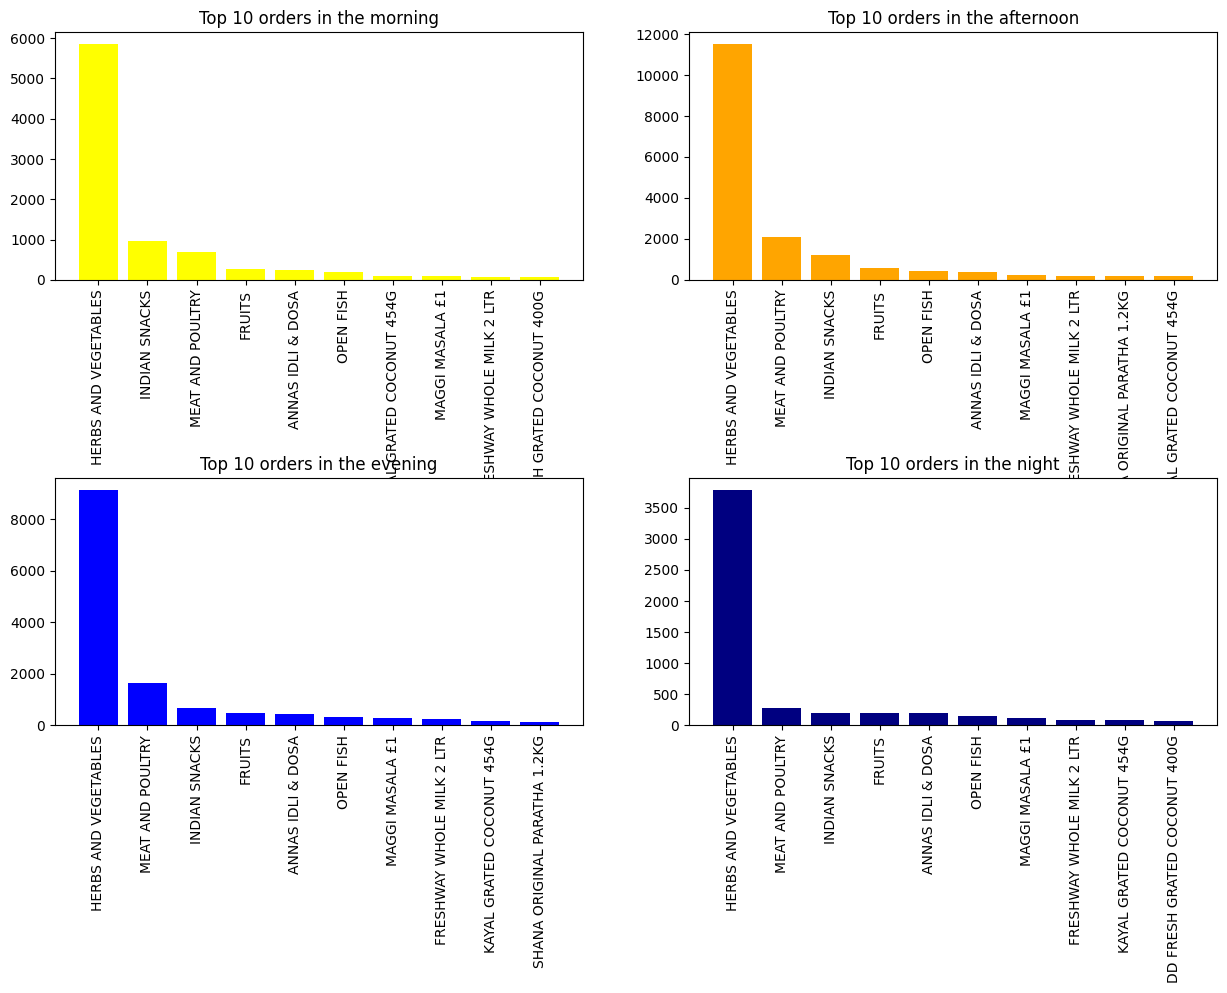

In [ ]:
items = df.groupby(['ProductDesc', 'Period_day'])['InvoiceNo'].count().reset_index().sort_values(['Period_day', 'InvoiceNo'], ascending=False)

fig, axs = plt.subplots(2, 2, figsize=(15, 9))
plt.subplots_adjust(hspace=0.8)

# Define colors for each period of the day
colors = {
    'Morning': 'yellow',
    'Afternoon': 'orange',
    'Evening': 'blue',
    'Night': 'navy'
}

# Top 10 orders in the morning
dfMorning = items[items['Period_day'] == 'Morning'].head(10)
axs[0, 0].bar(dfMorning.ProductDesc, dfMorning.InvoiceNo, color=colors['Morning'])
axs[0, 0].set_title('Top 10 orders in the morning')
axs[0, 0].tick_params(axis='x', rotation=90)

# Top 10 orders in the afternoon
dfAfternoon = items[items['Period_day'] == 'Afternoon'].head(10)
axs[0, 1].bar(dfAfternoon.ProductDesc, dfAfternoon.InvoiceNo, color=colors['Afternoon'])
axs[0, 1].set_title('Top 10 orders in the afternoon')
axs[0, 1].tick_params(axis='x', rotation=90)

# Top 10 orders in the evening
dfEvening = items[items['Period_day'] == 'Evening'].head(10)
axs[1, 0].bar(dfEvening.ProductDesc, dfEvening.InvoiceNo, color=colors['Evening'])
axs[1, 0].set_title('Top 10 orders in the evening')
axs[1, 0].tick_params(axis='x', rotation=90)

# Top 10 orders in the night
dfNight = items[items['Period_day'] == 'Night'].head(10)
axs[1, 1].bar(dfNight.ProductDesc, dfNight.InvoiceNo, color=colors['Night'])
axs[1, 1].set_title('Top 10 orders in the night')
axs[1, 1].tick_params(axis='x', rotation=90)


plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


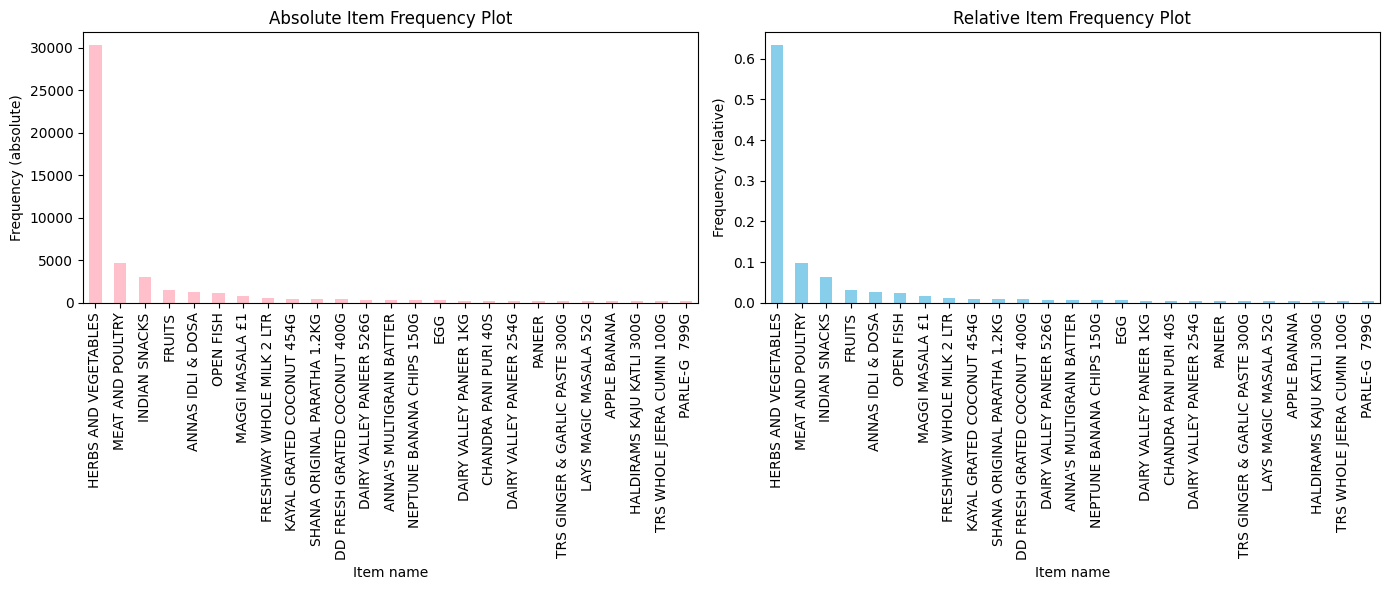

In [ ]:
# Count the frequency of each item
item_counts = df['ProductDesc'].value_counts().head(25)  # Get the top 25 items

# Calculate relative frequencies
relative_frequencies = item_counts / item_counts.sum()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot absolute item frequency
item_counts.plot(kind='bar', color='pink', ax=axes[0])
axes[0].set_xlabel('Item name')
axes[0].set_ylabel('Frequency (absolute)')
axes[0].set_title('Absolute Item Frequency Plot')

# Plot relative item frequency
relative_frequencies.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_xlabel('Item name')
axes[1].set_ylabel('Frequency (relative)')
axes[1].set_title('Relative Item Frequency Plot')

plt.tight_layout()
plt.show()

In [ ]:
# After Preprocessing
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 109199 rows and 10 columns


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.sample(10)
# Some random rows from dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,Date,Time,ProductCode,ProductDesc,QtySold,UnitPrice,Period_day,Weekday_Weekend,date_time
104365,151806,2024-05-05,13:15:44,EH4999,PARLE HIDE & SEEK 75G,1.000,0.70,Afternoon,Weekend,2024-05-05 13:15:44
36840,140719,2024-02-17,12:32:39,P00033904,HERBS AND VEGETABLES,0.708,4.24,Afternoon,Weekend,2024-02-17 12:32:39
106167,152131,2024-05-07,13:21:58,P00021418,MEAT AND POULTRY,1.000,13.50,Afternoon,Weekday,2024-05-07 13:21:58
27009,139167,2024-02-04,15:54:53,103547,TRS SOONF FENNEL SEEDS 100G,1.000,1.09,Afternoon,Weekend,2024-02-04 15:54:53
53222,143286,2024-03-08,12:37:01,102033,HERBS AND VEGETABLES,0.516,2.57,Afternoon,Weekday,2024-03-08 12:37:01
167603,141220,2024-07-17,17:48:41,103492,TRS CHANA DAL 500G,1.000,1.29,Evening,Weekday,2024-07-17 17:48:41
113058,153340,2024-05-15,14:08:29,P00034,ALOO PARATHA,1.000,2.99,Afternoon,Weekday,2024-05-15 14:08:29
162026,140212,2024-07-11,12:12:01,EH4496,HERBS AND VEGETABLES,1.000,2.99,Afternoon,Weekday,2024-07-11 12:12:01
51608,143000,2024-03-05,19:48:03,P00033002,LB PLAIN NAAN BREAD,1.000,1.29,Night,Weekday,2024-03-05 19:48:03
1403,135150,2024-01-03,17:44:41,100640,HERBS AND VEGETABLES,1.000,0.89,Evening,Weekday,2024-01-03 17:44:41


In [ ]:
# Flatten the 'ProductDesc' column of the DataFrame into a 1D array and assign
# it to the variable 'd'
d = df['ProductDesc'].values.ravel()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Maximum sold Items count
import collections
val=collections.Counter(d)
# Get counts in descending order
sorted_counts = val.most_common(20)
sorted_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('HERBS AND VEGETABLES', 30320),
 ('MEAT AND POULTRY', 4706),
 ('INDIAN SNACKS', 3075),
 ('FRUITS', 1534),
 ('ANNAS IDLI & DOSA', 1277),
 ('OPEN FISH', 1100),
 ('MAGGI MASALA £1', 736),
 ('FRESHWAY WHOLE MILK 2 LTR', 558),
 ('KAYAL GRATED COCONUT 454G', 496),
 ('SHANA ORIGINAL PARATHA 1.2KG', 402),
 ('DD FRESH GRATED COCONUT 400G', 385),
 ('DAIRY VALLEY PANEER 526G', 331),
 ("ANNA'S MULTIGRAIN BATTER", 307),
 ('NEPTUNE BANANA CHIPS 150G', 271),
 ('EGG', 270),
 ('DAIRY VALLEY PANEER 1KG', 236),
 ('CHANDRA PANI PURI 40S', 235),
 ('DAIRY VALLEY PANEER 254G', 233),
 ('PANEER', 232),
 ('TRS GINGER & GARLIC PASTE 300G', 207)]

In [ ]:
#Finding unique items in the Data Frame
items = (df['ProductDesc'].unique())
for i in items:
    print(i)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Streaming output truncated to the last 5000 lines.
TRS GINGER & GARLIC PASTE 300G
TRS CHANA DAL 2KG
SHANA OKRA SLICED RINGS 300G
TOPOP FAR FAR STICK COLOR 25
TRS BLACK SALT POWDER 200G
TRS WHOLE JEERA CUMIN  400G
JAIMIN ANARDANA GOLI 175G
FRUITELLA BLACKCURRENT 41G
NESTLE KITKAT 43.5G
ALLISON DRIED ACTIVE YEAST 125
NEPTUNE FROZEN POROTTA 300G
HALDIRAMS HABSHI HALWA 300G
SAKTHI MUTTON MASALA 200G
NIRU ODIYAL FLOUR 400G
SAMAYAL RED RAW RICE 1KG
SAHANA IDLY RAVA 1KG
D/HORSE APPAM IDIYAPPAM PD 1KG
KURKURE GREEN CHUTNEY 85G
SANTOOR 100G
MDH BOMBAY BIRYANI MASALA 100G
BLACK BIN SACKS 20
TRS CINNAMON STICKS 50G
PATANJALI AMLA CANDY 500G
AGAS MIXED SPROUT 100G
DIET COCA COLA
KOKA MASALA FLAVOUR 85G
SHAN FRUIT CHAAT 60G
MDH CHUNKY CHAT MASALA 100G
ENW COOKING SALT 1.5KG
IDHAYAM SESAME OIL 1LTR
PATANJALI AASHIRVAAD AASHIRVAAD AASHIRVAAD AASHIRVAAD AASHIRVAAD ATTA NOODLES 240G
NATCO KALA NAMAK 100G
KOKA MUSHROOM FLAVOUR 85G
HALDIRAM'S ALOO PARATHA 400G
UDAYA IDLI RAVA 900G
TRS CHILLI POWDER  400G

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HERBS AND VEGETABLES'),
  Text(1, 0, 'MEAT AND POULTRY'),
  Text(2, 0, 'INDIAN SNACKS'),
  Text(3, 0, 'FRUITS'),
  Text(4, 0, 'ANNAS IDLI & DOSA'),
  Text(5, 0, 'OPEN FISH'),
  Text(6, 0, 'MAGGI MASALA £1'),
  Text(7, 0, 'FRESHWAY WHOLE MILK 2 LTR'),
  Text(8, 0, 'KAYAL GRATED COCONUT 454G'),
  Text(9, 0, 'SHANA ORIGINAL PARATHA 1.2KG')])

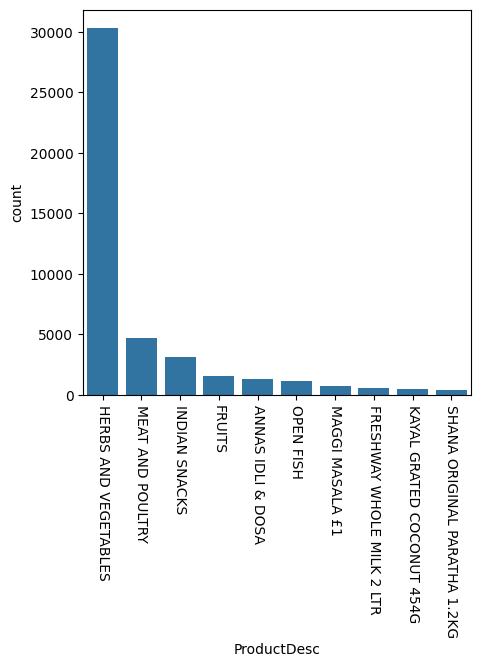

In [ ]:
#plot 10 most frequent products in dataset
sns.countplot(x = 'ProductDesc', data = df, order = df['ProductDesc'].value_counts().iloc[:10].index)
plt.xticks(rotation=-90)

In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['InvoiceNo', 'Date', 'Time', 'ProductCode', 'ProductDesc', 'QtySold',
       'UnitPrice', 'Period_day', 'Weekday_Weekend', 'date_time'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,Date,QtySold,UnitPrice
count,109199.000000,109199,109199.000000,109199.000000
mean,142130.427550,2024-04-16 17:44:51.486185472,1.088283,3.366579
min,132510.000000,2024-01-01 00:00:00,-6.000000,-28.990000
25%,137339.000000,2024-02-27 00:00:00,1.000000,1.290000
50%,140974.000000,2024-04-19 00:00:00,1.000000,2.090000
75%,146747.000000,2024-06-07 00:00:00,1.000000,3.590000
max,154226.000000,2024-07-26 00:00:00,200.000000,520.000000
std,5860.018521,NaN,1.266576,5.167836


In [ ]:
#clean the product names and Invoice number to remove extra spaces
df['ProductDesc'] = df['ProductDesc'].str.strip()
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df['InvoiceNo'] = df['InvoiceNo'].str.strip()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Create basket datafarme from transactions data with each row representing one basket**

In [ ]:
#create basket dataframe
basket = df.groupby(['InvoiceNo', 'ProductDesc'])['QtySold'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head(100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ProductDesc,10 FRESH EGG CLS A,100 PLASTIC SPOO D,100 PLASTIC SPOON,10INCH PAPER PLATE,2 POTATO 25KG,2BAG HERBS AND VEGETABLES,2BAG POTATOES,3ROSES 250G,50/50,5LR OIL 2BOXES,...,YELLOW PEAS,YEO ORGANIC 2L,YEPPEE,YOGURT,YOGURT 10KG,YORKSHIRE,YOUGURT,YUMSU CUP NOODLES60G,ZANDU BALM,ZED BLACK3IN1
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
132510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
    if isinstance(x, (int, float)):
        if x <= 0:
            return 0
        else:
            return 1
    elif pd.isna(x) or x == 'NaN':
        return 0
    else:
        return 0  # default for any other unexpected values

# Apply the encoding function
basket_sets = basket.applymap(encode_units)
basket_sets = basket_sets.dropna()
basket_sets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-12-66d92fb4ec7f>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


ProductDesc,10 FRESH EGG CLS A,100 PLASTIC SPOO D,100 PLASTIC SPOON,10INCH PAPER PLATE,2 POTATO 25KG,2BAG HERBS AND VEGETABLES,2BAG POTATOES,3ROSES 250G,50/50,5LR OIL 2BOXES,...,YELLOW PEAS,YEO ORGANIC 2L,YEPPEE,YOGURT,YOGURT 10KG,YORKSHIRE,YOUGURT,YUMSU CUP NOODLES60G,ZANDU BALM,ZED BLACK3IN1
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
132510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#we will filter out transactions that have less than 2 items
basket_sets = basket_sets[ (basket_sets > 0).sum(axis=1) >= 2]
basket_sets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ProductDesc,10 FRESH EGG CLS A,100 PLASTIC SPOO D,100 PLASTIC SPOON,10INCH PAPER PLATE,2 POTATO 25KG,2BAG HERBS AND VEGETABLES,2BAG POTATOES,3ROSES 250G,50/50,5LR OIL 2BOXES,...,YELLOW PEAS,YEO ORGANIC 2L,YEPPEE,YOGURT,YOGURT 10KG,YORKSHIRE,YOUGURT,YUMSU CUP NOODLES60G,ZANDU BALM,ZED BLACK3IN1
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
132517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
basket_sets.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(14043, 5419)

In [ ]:
# Compute the total count of transactions in the dataset
txn_count = len(basket_sets)
#txn_count
# Get the list of item names, excluding TID
items = basket_sets.columns
#items
# Initialize an empty list to store support values
support_values = []

# Calculate support for each item
for itemset in items:
    support_value = basket_sets[itemset].sum() / txn_count
    support_values.append((itemset, support_value))

# Convert the results into a dataframe
df_support = pd.DataFrame(support_values, columns=['Itemset', 'Support'])

# Display the results
df_support

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Itemset,Support
0,10 FRESH EGG CLS A,0.001353
1,100 PLASTIC SPOO D,0.000071
2,100 PLASTIC SPOON,0.000071
3,10INCH PAPER PLATE,0.000071
4,2 POTATO 25KG,0.000071
...,...,...
5414,YORKSHIRE,0.000071
5415,YOUGURT,0.000071
5416,YUMSU CUP NOODLES60G,0.000427
5417,ZANDU BALM,0.000214


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


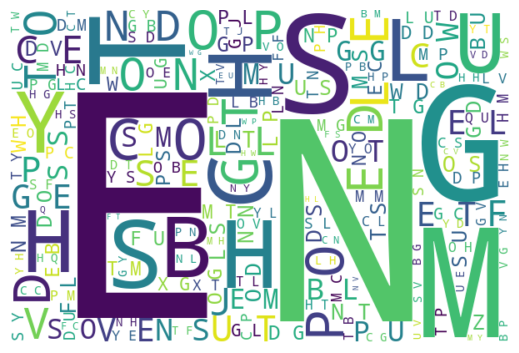

In [ ]:
# Create the word cloud to visualize frequent items
from wordcloud import WordCloud

# Combine Item values into a string with space separator
all_values = [item for txn in basket_sets for item in txn]
all_values_list = ' '.join(all_values)

# Create a word cloud object
wordcloud = WordCloud(width=600, height=400, background_color="white", min_font_size=8, colormap='viridis').generate(all_values_list)

# Display the word cloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**Run FP-growth algorithm on frequent item sets (items that frequently appear in the same basket)**

In [ ]:
#create minTransactions variable to represent the minimum number of baskets for support parameter
minTransaction = 150
totalTransactions = len(basket_sets.index)
min_support_calc = minTransaction/totalTransactions

print('number of baskets for analysis is', totalTransactions)
print('minimum support value is ', round(min_support_calc*100, 4), '%')

number of baskets for analysis is 14043
minimum support value is  1.0681 %


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#create frequent items sets with clculated minimum support
#frequent_itemsets = fpgrowth(basket_sets, min_support=min_support_calc, use_colnames=True)
#frequent_itemsets = apriori(basket_sets, 0.005, use_colnames=True)
frequent_itemsets = fpgrowth(basket_sets, 0.005, use_colnames=True)
frequent_itemsets.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support
count,256.000000
mean,0.014990
std,0.043577
min,0.005056
25%,0.005911
50%,0.007513
75%,0.010593
max,0.630323


In [ ]:
# Function to measure memory usage
def memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / 1024 / 1024  # Memory usage in MB

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Measure memory usage of Apriori
start_memory = memory_usage()
frequent_itemsets_apriori = apriori(basket_sets, min_support=0.005, use_colnames=True)
end_memory = memory_usage()
apriori_memory_usage = end_memory - start_memory

# Output memory usage results
print(f"Memory usage of Apriori: {apriori_memory_usage:.2f} MB")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Memory usage of Apriori: 0.44 MB


In [ ]:
# Measure memory usage of FP-Growth
start_memory = memory_usage()
frequent_itemsets_fpgrowth = fpgrowth(basket_sets, min_support=0.005, use_colnames=True)
end_memory = memory_usage()
fpgrowth_memory_usage = end_memory - start_memory

# Output memory usage results
print(f"Memory usage of FP-Growth: {fpgrowth_memory_usage:.2f} MB")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Memory usage of FP-Growth: 0.26 MB


In [ ]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.009044,(PARELE-G 88G)
1,0.630278,(HERBS AND VEGETABLES)
2,0.059460,(OPEN FISH)
3,0.010325,(PARLE HIDE & SEEK 75G)
4,0.093427,(FRUITS)
...,...,...
251,0.005270,"(HERBS AND VEGETABLES, TRS METHI SEEDS FENUGRE..."
252,0.005982,"(HERBS AND VEGETABLES, KTC SUNFLOWER OIL 5LTR)"
253,0.005341,"(UNCLE CHIPS 60G, HERBS AND VEGETABLES)"
254,0.006623,"(HERBS AND VEGETABLES, KURKURE MASALA MUNCH)"


In [ ]:
most_popular_items=frequent_itemsets.sort_values('support',ascending=False)
most_popular_items = most_popular_items.head(15)
most_popular_items
#Top 15 most frequent items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.630278,(HERBS AND VEGETABLES)
17,0.196468,(MEAT AND POULTRY)
3,0.143630,(INDIAN SNACKS)
57,0.134800,"(HERBS AND VEGETABLES, MEAT AND POULTRY)"
2,0.093427,(FRUITS)
44,0.085737,"(HERBS AND VEGETABLES, INDIAN SNACKS)"
6,0.085381,(ANNAS IDLI & DOSA)
39,0.078188,"(HERBS AND VEGETABLES, FRUITS)"
48,0.062807,"(HERBS AND VEGETABLES, ANNAS IDLI & DOSA)"
1,0.059460,(OPEN FISH)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


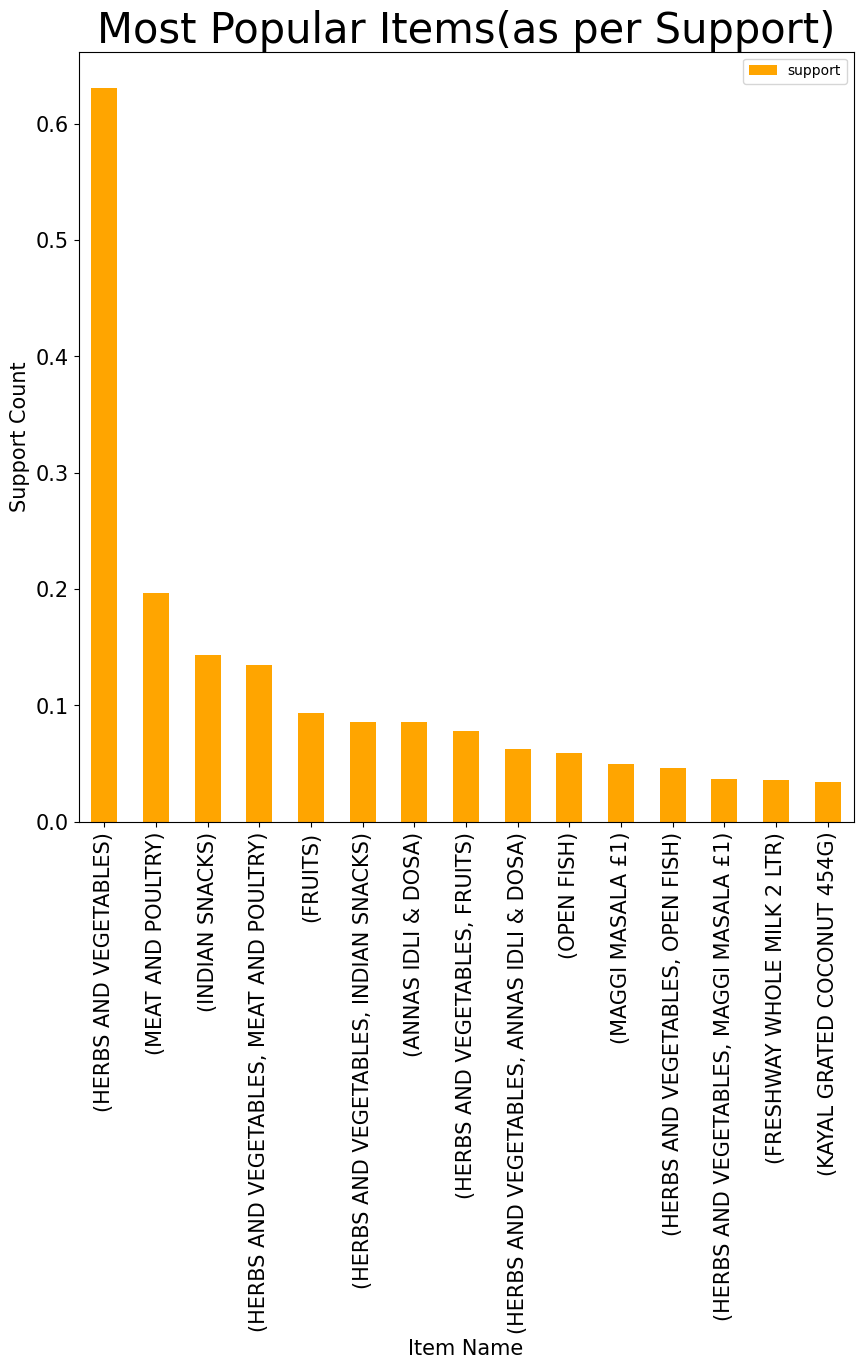

In [ ]:
most_popular_items.values.tolist()
plt.rcParams['figure.figsize']=(10,10)
most_popular_items.plot.bar('itemsets','support',color='Orange')
plt.xlabel('Item Name',fontsize=15)
plt.ylabel('Support Count',fontsize=15)
plt.title('Most Popular Items(as per Support)',fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('lift', ascending = False, inplace = True)
rules.head(100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
187,(DD FRESH GRATED COCONUT 400G),"(HERBS AND VEGETABLES, OPEN FISH)",0.026846,0.046002,0.005127,0.190981,4.151629,0.003892,1.179205,0.780073
186,"(HERBS AND VEGETABLES, OPEN FISH)",(DD FRESH GRATED COCONUT 400G),0.046002,0.026846,0.005127,0.111455,4.151629,0.003892,1.095222,0.795736
184,"(HERBS AND VEGETABLES, DD FRESH GRATED COCONUT...",(OPEN FISH),0.021505,0.059460,0.005127,0.238411,4.009581,0.003848,1.234970,0.767094
189,(OPEN FISH),"(HERBS AND VEGETABLES, DD FRESH GRATED COCONUT...",0.059460,0.021505,0.005127,0.086228,4.009581,0.003848,1.070830,0.798050
245,(KAYAL GRATED COCONUT 454G),"(HERBS AND VEGETABLES, OPEN FISH)",0.034038,0.046002,0.006053,0.177824,3.865613,0.004487,1.160334,0.767431
...,...,...,...,...,...,...,...,...,...,...
56,(IDHAYAM SESAME OIL 1LTR),(HERBS AND VEGETABLES),0.011750,0.630278,0.009613,0.818182,1.298128,0.002208,2.033469,0.232390
190,"(MEAT AND POULTRY, HERBS AND VEGETABLES)",(FRESHWAY WHOLE MILK 2 LTR),0.134800,0.035534,0.006195,0.045959,1.293386,0.001405,1.010927,0.262177
195,(FRESHWAY WHOLE MILK 2 LTR),"(MEAT AND POULTRY, HERBS AND VEGETABLES)",0.035534,0.134800,0.006195,0.174349,1.293386,0.001405,1.047900,0.235193
140,(TRS SOONF FENNEL SEEDS 100G),(HERBS AND VEGETABLES),0.006480,0.630278,0.005270,0.813187,1.290203,0.001185,1.979098,0.226395


In [ ]:
#association_lift=association_rules(frequent_itemsets,metric='lift',min_threshold=2)
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
#a_lift_top=association_lift.sort_values('lift',ascending=False)
a_lift_top=rules.sort_values('lift',ascending=False)
a_lift_top.drop(['antecedent support','consequent support'],axis=1).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,leverage,conviction,zhangs_metric
164,(DD FRESH GRATED COCONUT 400G),"(OPEN FISH, HERBS AND VEGETABLES)",0.005127,0.190981,4.151333,0.003892,1.179201,0.780057
161,"(OPEN FISH, HERBS AND VEGETABLES)",(DD FRESH GRATED COCONUT 400G),0.005127,0.111455,4.151333,0.003892,1.095220,0.795721
163,(OPEN FISH),"(DD FRESH GRATED COCONUT 400G, HERBS AND VEGET...",0.005127,0.086228,4.009295,0.003849,1.070828,0.798034
162,"(DD FRESH GRATED COCONUT 400G, HERBS AND VEGET...",(OPEN FISH),0.005127,0.238411,4.009295,0.003849,1.234964,0.767077
92,"(OPEN FISH, HERBS AND VEGETABLES)",(KAYAL GRATED COCONUT 454G),0.006053,0.131579,3.865338,0.004487,1.112317,0.777038
93,(KAYAL GRATED COCONUT 454G),"(OPEN FISH, HERBS AND VEGETABLES)",0.006053,0.177824,3.865338,0.004487,1.160330,0.767414
158,(OPEN FISH),(DD FRESH GRATED COCONUT 400G),0.006124,0.102994,3.836185,0.004528,1.084889,0.786067
159,(DD FRESH GRATED COCONUT 400G),(OPEN FISH),0.006124,0.228117,3.836185,0.004528,1.218494,0.759721
91,"(KAYAL GRATED COCONUT 454G, HERBS AND VEGETABLES)",(OPEN FISH),0.006053,0.223097,3.751772,0.004440,1.210622,0.753915
94,(OPEN FISH),"(KAYAL GRATED COCONUT 454G, HERBS AND VEGETABLES)",0.006053,0.101796,3.751772,0.004440,1.083125,0.779832


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules.head(30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PARELE-G 88G),(HERBS AND VEGETABLES),0.009044,0.630278,0.005412,0.598425,0.949462,-0.000288,0.920679,-0.050976
1,(OPEN FISH),(HERBS AND VEGETABLES),0.059460,0.630278,0.046002,0.773653,1.227478,0.008525,1.633426,0.197037
2,"(ANNAS IDLI & DOSA, OPEN FISH)",(HERBS AND VEGETABLES),0.007691,0.630278,0.006409,0.833333,1.322167,0.001562,2.218329,0.245554
3,"(OPEN FISH, MEAT AND POULTRY)",(HERBS AND VEGETABLES),0.011038,0.630278,0.008332,0.754839,1.197627,0.001375,1.508075,0.166857
4,"(OPEN FISH, FRUITS)",(HERBS AND VEGETABLES),0.007477,0.630278,0.006623,0.885714,1.405275,0.001910,3.235064,0.290568
5,"(OPEN FISH, INDIAN SNACKS)",(HERBS AND VEGETABLES),0.011892,0.630278,0.008901,0.748503,1.187575,0.001406,1.470083,0.159849
6,(PARLE HIDE & SEEK 75G),(HERBS AND VEGETABLES),0.010325,0.630278,0.006694,0.648276,1.028555,0.000186,1.051169,0.028052
7,(FRUITS),(HERBS AND VEGETABLES),0.093427,0.630278,0.078188,0.836890,1.327810,0.019303,2.266704,0.272323
8,"(INDIAN SNACKS, FRUITS)",(HERBS AND VEGETABLES),0.015168,0.630278,0.012462,0.821596,1.303545,0.002902,2.072387,0.236447
9,"(FRUITS, MEAT AND POULTRY)",(HERBS AND VEGETABLES),0.014171,0.630278,0.012319,0.869347,1.379306,0.003388,2.829792,0.278951


In [ ]:
#association_confi=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.5)
rules=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.5)
#a_confi_top=association_confi.sort_values('confidence',ascending=False)
a_confi_top=rules.sort_values('confidence',ascending=False)
a_confi_top.drop(['antecedent support','consequent support'],axis=1).head(40)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,leverage,conviction,zhangs_metric
26,"(KAYAL GRATED COCONUT 454G, MEAT AND POULTRY)",(HERBS AND VEGETABLES),0.005697,0.909091,1.442261,0.001747,4.066444,0.308578
35,"(MAGGI MASALA £1, FRUITS)",(HERBS AND VEGETABLES),0.005555,0.896552,1.422368,0.001649,3.573541,0.298798
25,"(KAYAL GRATED COCONUT 454G, OPEN FISH)",(HERBS AND VEGETABLES),0.006053,0.894737,1.419489,0.001789,3.511929,0.297534
4,"(OPEN FISH, FRUITS)",(HERBS AND VEGETABLES),0.006623,0.885714,1.405175,0.001910,3.234671,0.290517
47,(TRS RED PEANUT KERNELS 375G),(HERBS AND VEGETABLES),0.006765,0.871560,1.382718,0.001873,2.878197,0.278952
16,"(ANNAS IDLI & DOSA, FRUITS)",(HERBS AND VEGETABLES),0.009116,0.870748,1.381431,0.002517,2.860130,0.279034
9,"(MEAT AND POULTRY, FRUITS)",(HERBS AND VEGETABLES),0.012320,0.869347,1.379208,0.003387,2.829448,0.278898
42,"(OPEN FISH, DD FRESH GRATED COCONUT 400G)",(HERBS AND VEGETABLES),0.005127,0.837209,1.328222,0.001267,2.270871,0.248637
7,(FRUITS),(HERBS AND VEGETABLES),0.078194,0.836890,1.327716,0.019300,2.266429,0.272266
2,"(ANNAS IDLI & DOSA, OPEN FISH)",(HERBS AND VEGETABLES),0.006409,0.833333,1.322073,0.001561,2.218060,0.245500


In [ ]:
association_supp=association_rules(frequent_itemsets,metric='support',min_threshold=0.05)
a_supp_top=association_supp.sort_values('support',ascending=False)
a_supp_top.drop(['antecedent support','consequent support'],axis=1).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,leverage,conviction,zhangs_metric
6,(MEAT AND POULTRY),(HERBS AND VEGETABLES),0.134810,0.686118,1.088518,0.010963,1.177757,0.101204
7,(HERBS AND VEGETABLES),(MEAT AND POULTRY),0.134810,0.213874,1.088518,0.010963,1.022124,0.219975
2,(INDIAN SNACKS),(HERBS AND VEGETABLES),0.085743,0.596926,0.947016,-0.004797,0.917144,-0.061326
3,(HERBS AND VEGETABLES),(INDIAN SNACKS),0.085743,0.136030,0.947016,-0.004797,0.991191,-0.131450
0,(FRUITS),(HERBS AND VEGETABLES),0.078194,0.836890,1.327716,0.019300,2.266429,0.272266


In [ ]:
rules.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,0.017852,0.630323,0.013033,0.750045,1.189938,0.001781,1.628083,0.154684
std,0.027528,0.000000,0.018918,0.069891,0.110881,0.002696,0.595879,0.082241
min,0.006124,0.630323,0.005056,0.596926,0.947016,-0.004797,0.917144,-0.061326
25%,0.008047,0.630323,0.005982,0.707317,1.122150,0.000775,1.263062,0.109815
50%,0.010469,0.630323,0.007691,0.750000,1.189866,0.001300,1.478707,0.162156
75%,0.013887,0.630323,0.010184,0.792593,1.257438,0.001789,1.782370,0.206720
max,0.196482,0.630323,0.134810,0.909091,1.442261,0.019300,4.066444,0.308578


In [ ]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         89 non-null     object 
 1   consequents         89 non-null     object 
 2   antecedent support  89 non-null     float64
 3   consequent support  89 non-null     float64
 4   support             89 non-null     float64
 5   confidence          89 non-null     float64
 6   lift                89 non-null     float64
 7   leverage            89 non-null     float64
 8   conviction          89 non-null     float64
 9   zhangs_metric       89 non-null     float64
 10  chi2                89 non-null     float64
 11  p-value             89 non-null     float64
 12  coverage            89 non-null     float64
dtypes: float64(11), object(2)
memory usage: 9.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Function to perform Chi-Square test
from scipy.stats import chi2_contingency
def chi_square_test(rule, df):
    antecedent = rule['antecedents']
    consequent = rule['consequents']

    # Create a contingency table
    observed = pd.crosstab(basket_sets[list(antecedent)].all(axis=1), basket_sets[list(consequent)].all(axis=1))

    # Perform Chi-Square test
    chi2, p, dof, ex = chi2_contingency(observed, correction=False)
    return chi2, p

# Applying Chi-Square test to each rule
rules['chi2'] = rules.apply(lambda rule: chi_square_test(rule, df)[0], axis=1)
rules['p-value'] = rules.apply(lambda rule: chi_square_test(rule, df)[1], axis=1)

# Display rules with their chi2 and p-values
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'chi2', 'p-value']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                         antecedents             consequents   support  \
0                     (PARELE-G 88G)  (HERBS AND VEGETABLES)  0.005412   
1                        (OPEN FISH)  (HERBS AND VEGETABLES)  0.046002   
2     (OPEN FISH, ANNAS IDLI & DOSA)  (HERBS AND VEGETABLES)  0.006409   
3      (OPEN FISH, MEAT AND POULTRY)  (HERBS AND VEGETABLES)  0.008332   
4                (OPEN FISH, FRUITS)  (HERBS AND VEGETABLES)  0.006623   
..                               ...                     ...       ...   
84  (TRS METHI SEEDS FENUGREEK 100G)  (HERBS AND VEGETABLES)  0.005270   
85          (KTC SUNFLOWER OIL 5LTR)  (HERBS AND VEGETABLES)  0.005982   
86                 (UNCLE CHIPS 60G)  (HERBS AND VEGETABLES)  0.005341   
87            (KURKURE MASALA MUNCH)  (HERBS AND VEGETABLES)  0.006623   
88     (BRITANNIA LITTLE HEARTS 75G)  (HERBS AND VEGETABLES)  0.007691   

    confidence      lift       chi2       p-value  
0     0.598425  0.949462   0.558019  4.550595e-01  
1     0

In [ ]:
# Define a coverage threshold
coverage_threshold = 0.05

# Calculate coverage for each rule
rules['coverage'] = rules['antecedent support']

# Filter rules based on coverage threshold
filtered_rules = rules[rules['coverage'] >= coverage_threshold]

# Display rules with their chi2, p-values, and coverage
print(filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'chi2', 'p-value', 'coverage']])

            antecedents             consequents   support  confidence  \
1           (OPEN FISH)  (HERBS AND VEGETABLES)  0.046002    0.773653   
7              (FRUITS)  (HERBS AND VEGETABLES)  0.078188    0.836890   
10      (INDIAN SNACKS)  (HERBS AND VEGETABLES)  0.085737    0.596926   
15  (ANNAS IDLI & DOSA)  (HERBS AND VEGETABLES)  0.062807    0.735613   
43   (MEAT AND POULTRY)  (HERBS AND VEGETABLES)  0.134800    0.686118   

        lift        chi2       p-value  coverage  
1   1.227478   78.314915  8.785599e-19  0.059460  
7   1.327810  265.114987  1.317080e-59  0.093427  
10  0.947083   11.243176  7.991629e-04  0.143630  
15  1.167124   62.418523  2.776990e-15  0.085381  
43  1.088595   45.943902  1.216881e-11  0.196468  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def remove_from_list(y, item_to_search):
  newlist = list()
  for i in y:
    if i not in item_to_search:
      newlist.append(i)
  return newlist

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules['antecedents']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents
0,(OPEN FISH)
1,(FRUITS)
2,"(INDIAN SNACKS, FRUITS)"
3,"(MEAT AND POULTRY, FRUITS)"
4,(INDIAN SNACKS)
5,"(INDIAN SNACKS, MEAT AND POULTRY)"
6,(DAIRY VALLEY PANEER 1KG)
7,(ANNAS IDLI & DOSA)
8,(CHANDRA PANI PURI 40S)
9,(DAIRY VALLEY PANEER 526G)


In [ ]:
rules['consequents']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,consequents
0,(HERBS AND VEGETABLES)
1,(HERBS AND VEGETABLES)
2,(HERBS AND VEGETABLES)
3,(HERBS AND VEGETABLES)
4,(HERBS AND VEGETABLES)
5,(HERBS AND VEGETABLES)
6,(HERBS AND VEGETABLES)
7,(HERBS AND VEGETABLES)
8,(HERBS AND VEGETABLES)
9,(HERBS AND VEGETABLES)


In [ ]:
def search_list(item_to_search, list_to_search = rules['antecedents']):
  print(item_to_search)
  max_lift = 3
  item_to_recommend = ''
  for i, item in enumerate(list_to_search):
    if set(list(item_to_search)).issubset(set(list(item))):
      if rules['lift'][i] > max_lift:
        max_lift = rules['lift'][i]
        y = list(rules['antecedents'][i])
        x = remove_from_list(y, item_to_search)
        item_to_recommend = list(rules['consequents'][i]) + x
  if item_to_recommend == '':
    print("There are no Product recommendations")
  else:
    return print(f"People who bought this also bought: {item_to_recommend}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from numpy.lib.arraysetops import unique

product_catalog = list(df['ProductDesc'].unique())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
product_catalog

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['FRESHWAY WHOLE MILK 2 LTR',
 'HERBS AND VEGETABLES',
 'KTC VEGETABLE OIL 1 LITRE',
 'UDAYA KRISHNA AGMARK GHEE500ML',
 'TRS WHOLE JEERA CUMIN 100G',
 'EASTERN PAVBHAJI MASALA 100G',
 'DD FRESH GRATED COCONUT 400G',
 'ELAKKYA HOTJAFFNA MIXTURE 450G',
 'ANNAS IDLI & DOSA',
 'HALDIRAMS PULKA ROTI 360G',
 'PANEER BLOCK 250G',
 'HALDIRAMS GOBHI PARATHA 400G',
 'ELAKKIA SPICY PEANUTS 175G',
 'VOLVIC MINERAL WATER 1.5LITRES',
 'TRS WHOLE GREEN PEAS',
 'TOPOP PAWA MEDIUM 1KG',
 'SHANA HERBS AND VEGETABLES 300G',
 'SHANA GUAR 300G',
 'GITS DOSAI MIX 500G',
 'JALPUR RICE  FLOUR 1KG',
 'TRS WHOLE BLACK PEPPER 400G',
 'TRS DESIC COCONUT MEDIUM 1KG',
 'ELAKKYA JAFFNAHOT MIXTURE 175G',
 'NAASTA B JEERA KHAKHRA 200G',
 'PURVI RICE VERMICELLI 200G',
 'KTC PURE SUNFLOWER OIL 1L',
 'PANEER CUBES 500G',
 'KTC CHICK PEAS 400G',
 'TOPOP TOMATOES CHOPPED 400G',
 "ANNA'S MULTIGRAIN BATTER",
 'SHANA GRATED COCONUT 300G',
 'FAIRY LEMON 320ML',
 'KTC SUNFLOWER OIL 5LTR',
 "HALDIRAM'S BATATA VADA300G",
 "LDIRA

In [ ]:
len(product_catalog)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5419

In [ ]:
for i in range(len(product_catalog)):
  search_list([product_catalog[i]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Streaming output truncated to the last 5000 lines.
['YARA']
There are no Product recommendations
['RUBICON MANGO 1LT']
There are no Product recommendations
['ALUMINIUM']
There are no Product recommendations
['ONKEN']
There are no Product recommendations
['MTR GULAB JAMUN 500G']
There are no Product recommendations
['GREEN PAPPAYA']
There are no Product recommendations
['EASTERN CHICKEN 65 MASALA 50G']
There are no Product recommendations
['LANCASHIRE']
There are no Product recommendations
['NATCO TAKMURIA SEEDS 100G']
There are no Product recommendations
['TRIP RASPBERRY 250ML']
There are no Product recommendations
['TRIP LEMON 250ML']
There are no Product recommendations
['PINK SALT']
There are no Product recommendations
['DD TAPIOCA CUT 1.5KG']
There are no Product recommendations
['SARAS COCOUNT VARUTHARA 200G']
There are no Product recommendations
['RED SPLIT']
There are no Product recommendations
['NATCO CHILLI PICKLE 300G']
There are no Product recommendations
['CHOPPED SPINACH']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


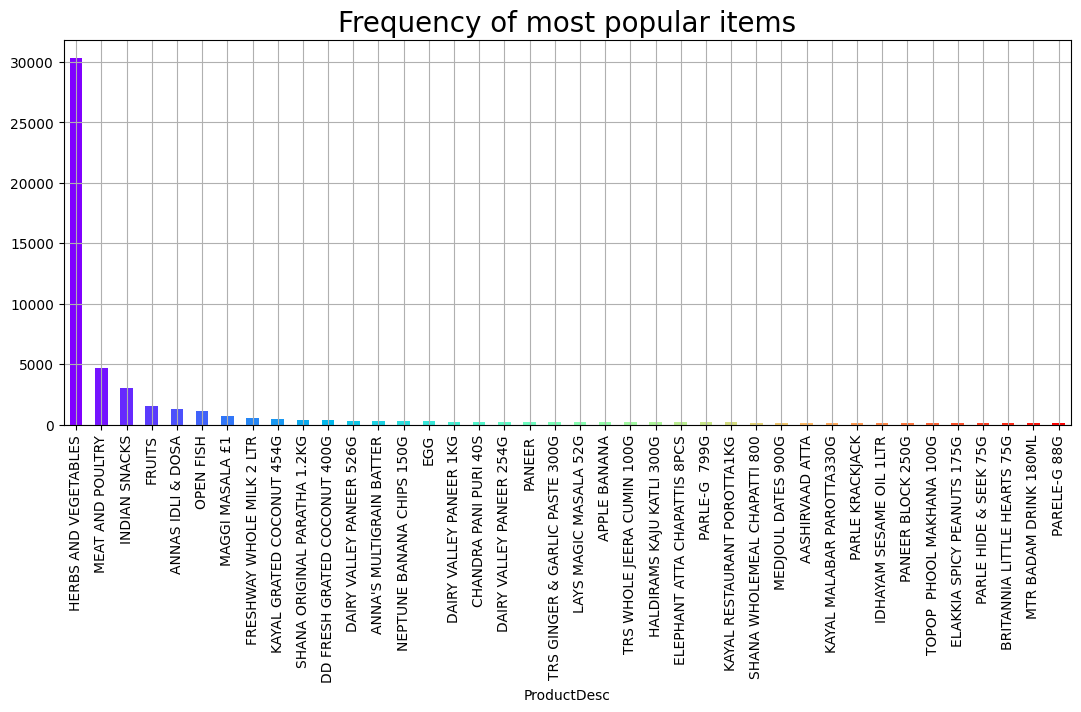

In [ ]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df['ProductDesc'].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('Frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [ ]:
#pip install matplotlib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


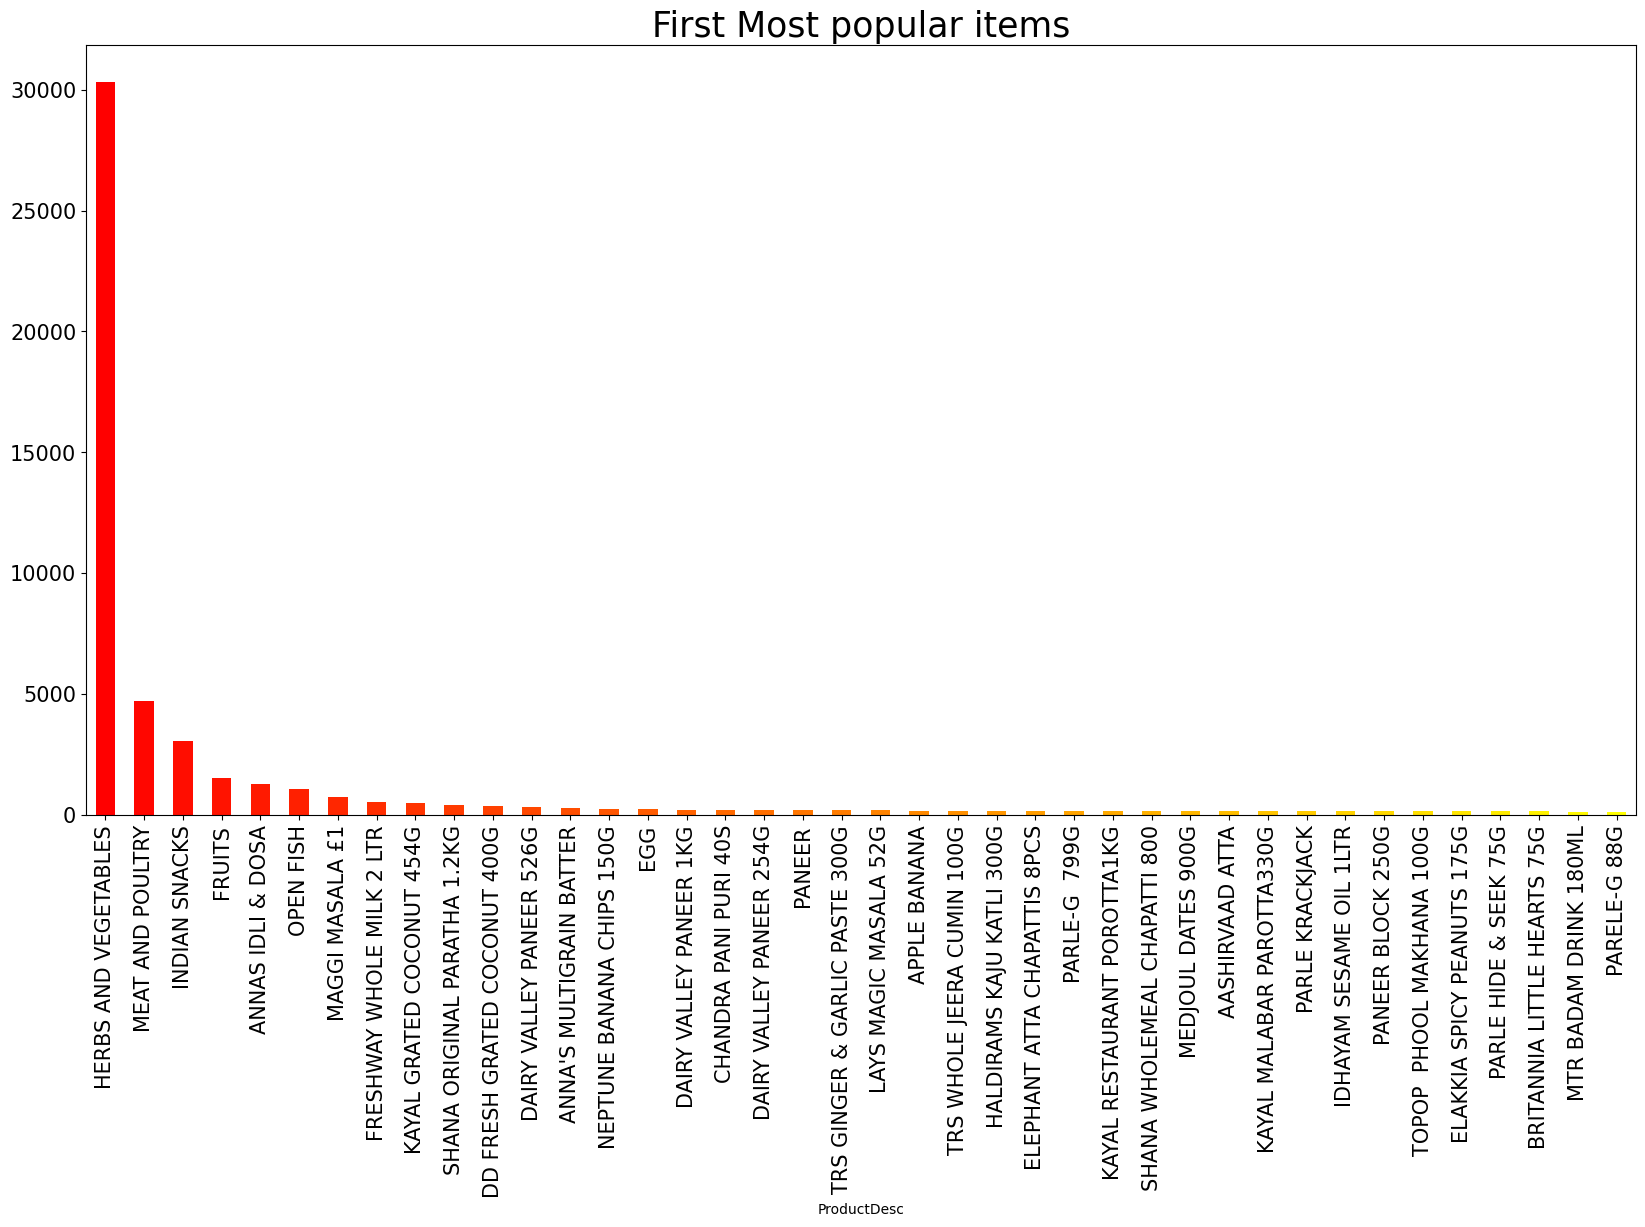

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
color = plt.cm.autumn(np.linspace(0, 1, 40))
df['ProductDesc'].value_counts().head(40).plot.bar(color = color)
plt.title('First Most popular items', fontsize = 25)
plt.xticks(rotation = 90 , fontsize = 15)
plt.yticks(fontsize = 15)
#plt.grid()

plt.show()

**Save results to csv file based on desired association parameters**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


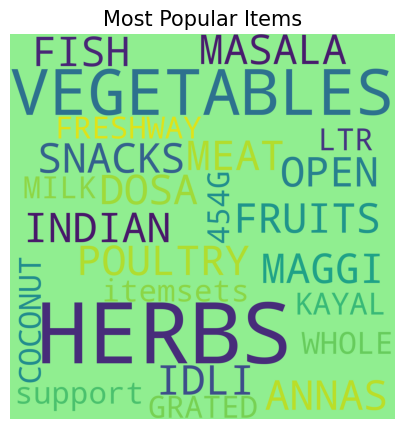

In [ ]:
#Word Cloud for most popular items
plt.rcParams['figure.figsize']=(5,5)
wordcloud=WordCloud(background_color = 'lightgreen', width = 1500, height = 1500, max_words = 121).generate(str(most_popular_items))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 15)
plt.show()

In [ ]:
rules[(rules['lift'] >= 1.4) & (rules['confidence'] >= 0.3)].sort_values(by=['confidence', 'lift'], ascending=False).to_excel(r'D:\Geetha\Project\Online_Retail_Results_FPGrowth.xlsx', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print('It took ', datetime.now() - startTime, ' to run')

It took  0:04:51.157652  to run


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install python-igraph

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


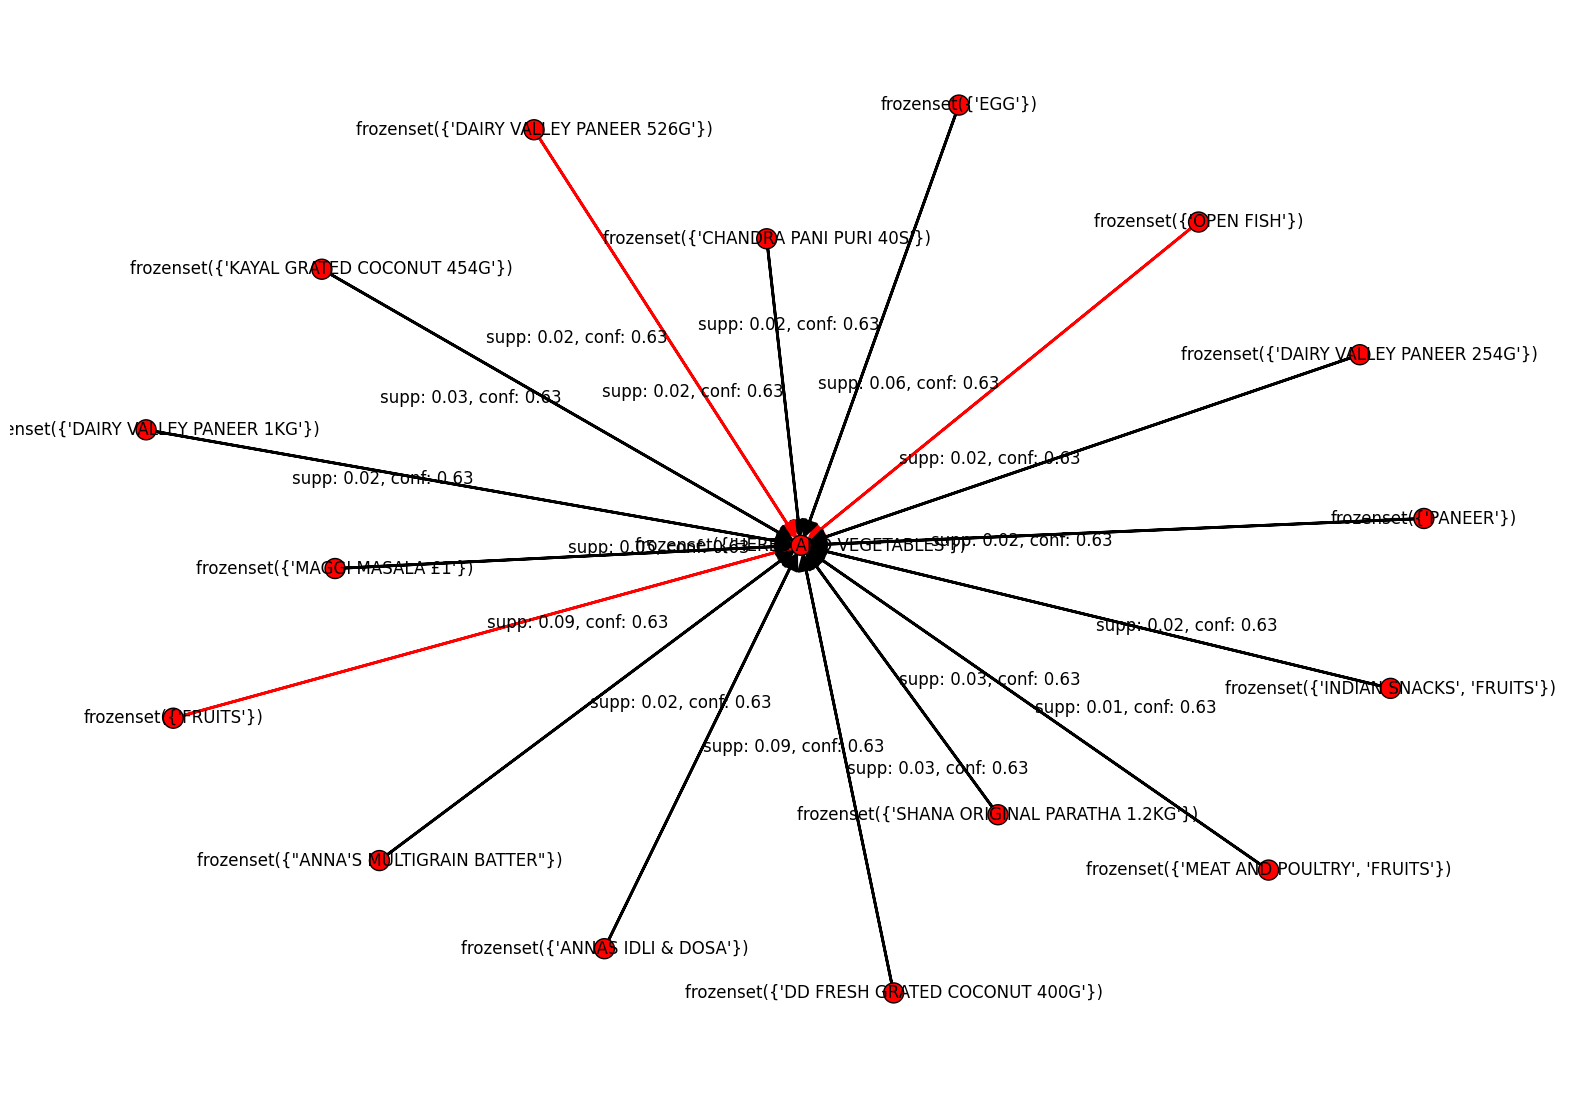

In [ ]:
#Visualizing Key Product Associations-
# We utilized the python-igraph package to visualize the most significant association rules,
# making it easier to identify and interpret key relationships between products.
#The edges in the graph represent these rules, with the edge highlighted in red
#indicating the rule with the highest support, emphasizing its prominence among the associations.
import igraph as ig
# Filter rules with confidence > 0.5
filtered_rules = rules[rules['confidence'] > 0.7]

# Create an igraph graph from the filtered DataFrame
g = ig.Graph.TupleList(filtered_rules.itertuples(index=False), directed=True,
                       edge_attrs=['support', 'confidence'])

# Identify the top 3 support values
top_support_indices = filtered_rules.nlargest(3, 'support').index

# Map the DataFrame indices to graph edge indices
edge_indices = [i for i, edge in enumerate(g.es) if edge.index in top_support_indices]

# Plotting the graph
layout = g.layout("kk")  # Kamada-Kawai layout
fig, ax = plt.subplots(figsize=(20, 14))

# Draw the graph with labels
visual_style = {
    "vertex_label": g.vs["name"],
    "edge_label": [(f"supp: {edge['support']:.2f}, conf: {edge['confidence']:.2f}") for edge in g.es],
    "layout": layout,
    "target": ax,
    "vertex_size": 20,
    "bbox": (700, 500),
    "edge_color": ["red" if i in edge_indices else "black" for i in range(len(g.es))]
}

ig.plot(g, **visual_style)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py

Number of rules with support level 10%: [0, 0, 0, 1, 1, 1, 1, 2, 2]
Number of rules with support level 5%: [0, 1, 2, 3, 4, 4, 4, 5, 7]
Number of rules with support level 1%: [0, 5, 19, 23, 24, 24, 24, 26, 48]
Number of rules with support level 0.5%: [1, 20, 68, 87, 89, 89, 89, 98, 165]


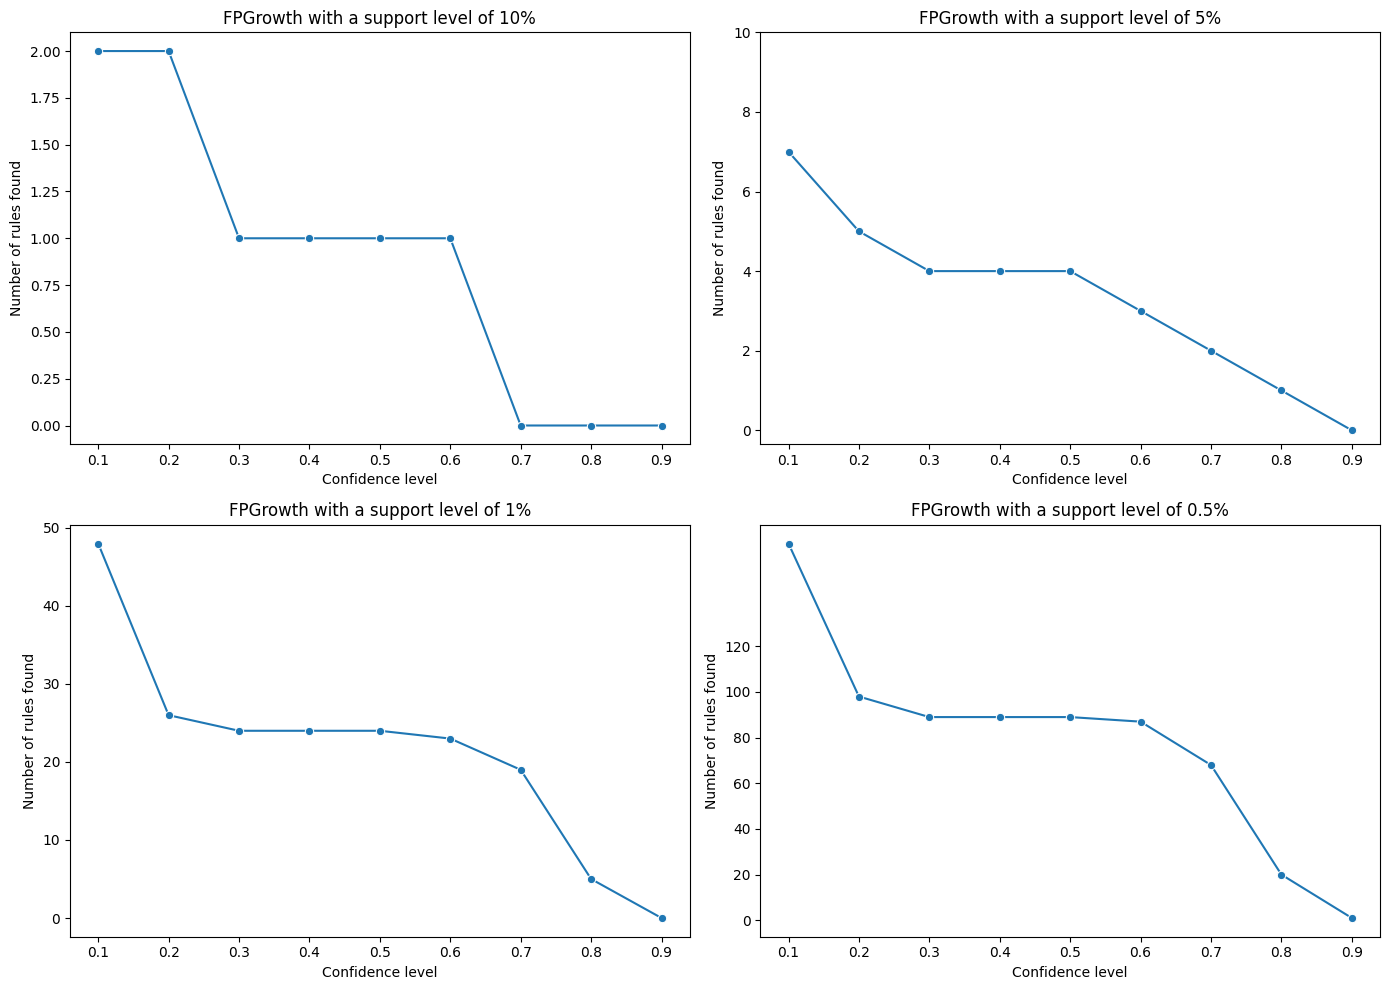

In [ ]:
# Support and confidence values
support_levels = [0.1, 0.05, 0.01, 0.005]
confidence_levels = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# Initialize lists to store the number of rules
rules_sup10 = []
rules_sup5 = []
rules_sup1 = []
rules_sup0_5 = []

# Apriori algorithm with different support levels
for conf in confidence_levels:
    # Support level 10%
    frequent_itemsets = fpgrowth(basket_sets, min_support=support_levels[0], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf)
    rules_sup10.append(len(rules))

    # Support level 5%
    frequent_itemsets = fpgrowth(basket_sets, min_support=support_levels[1], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf)
    rules_sup5.append(len(rules))

    # Support level 1%
    frequent_itemsets = fpgrowth(basket_sets, min_support=support_levels[2], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf)
    rules_sup1.append(len(rules))

    # Support level 0.5%
    frequent_itemsets = fpgrowth(basket_sets, min_support=support_levels[3], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf)
    rules_sup0_5.append(len(rules))

print("Number of rules with support level 10%:", rules_sup10)
print("Number of rules with support level 5%:", rules_sup5)
print("Number of rules with support level 1%:", rules_sup1)
print("Number of rules with support level 0.5%:", rules_sup0_5)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot for support level 10%
sns.lineplot(x=confidence_levels, y=rules_sup10, marker='o', ax=axes[0, 0])
axes[0, 0].set_title('FPGrowth with a support level of 10%')
axes[0, 0].set_xlabel('Confidence level')
axes[0, 0].set_ylabel('Number of rules found')

# Plot for support level 5%
sns.lineplot(x=confidence_levels, y=rules_sup5, marker='o', ax=axes[0, 1])
axes[0, 1].set_title('FPGrowth with a support level of 5%')
axes[0, 1].set_xlabel('Confidence level')
axes[0, 1].set_ylabel('Number of rules found')
axes[0, 1].set_yticks(range(0, 11, 2))

# Plot for support level 1%
sns.lineplot(x=confidence_levels, y=rules_sup1, marker='o', ax=axes[1, 0])
axes[1, 0].set_title('FPGrowth with a support level of 1%')
axes[1, 0].set_xlabel('Confidence level')
axes[1, 0].set_ylabel('Number of rules found')
axes[1, 0].set_yticks(range(0, 51, 10))

# Plot for support level 0.5%
sns.lineplot(x=confidence_levels, y=rules_sup0_5, marker='o', ax=axes[1, 1])
axes[1, 1].set_title('FPGrowth with a support level of 0.5%')
axes[1, 1].set_xlabel('Confidence level')
axes[1, 1].set_ylabel('Number of rules found')
axes[1, 1].set_yticks(range(0, 131, 20))

plt.tight_layout()
plt.show()

In [ ]:
len(rules)

NameError: name 'rules' is not defined